<a href="https://colab.research.google.com/github/R02198/Mobile-Price-Prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Prediction

## Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [20]:
df = pd.read_csv("mobile_data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### There are no Null values present in dataset 

In [22]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## ploting box plot for checking outliers in dataset

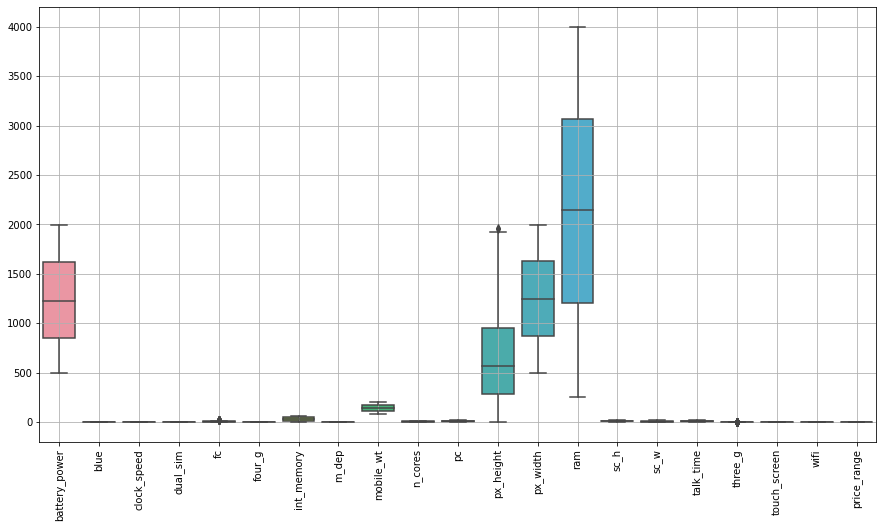

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.grid()
plt.xticks(rotation=90)
plt.show()

## ploting box plot speratly for FC 


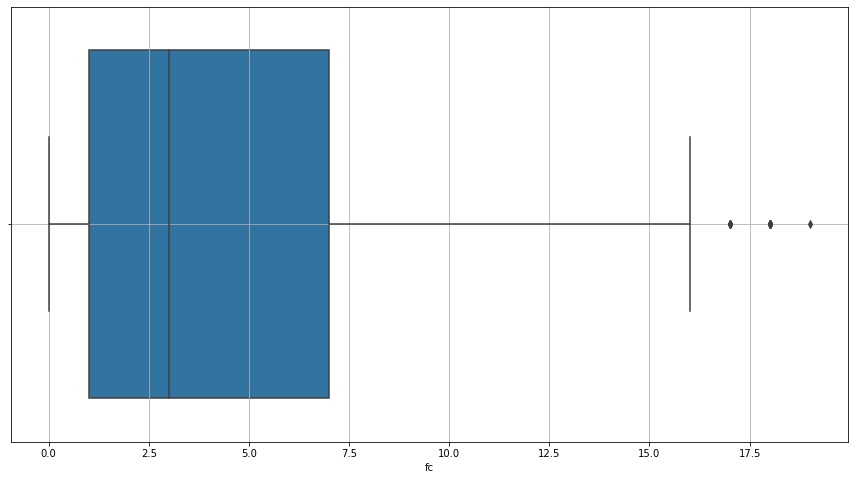

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(df.fc)
plt.grid()
plt.show()

In [25]:
df[df.fc > 16]                 # display outlier

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


In [26]:
index_fc = df[df.fc > 16].index      # storing index of outlier 

In [27]:
df.drop(index_fc,axis=0,inplace=True)       # droping outlier

## ploting box plot speratly for px


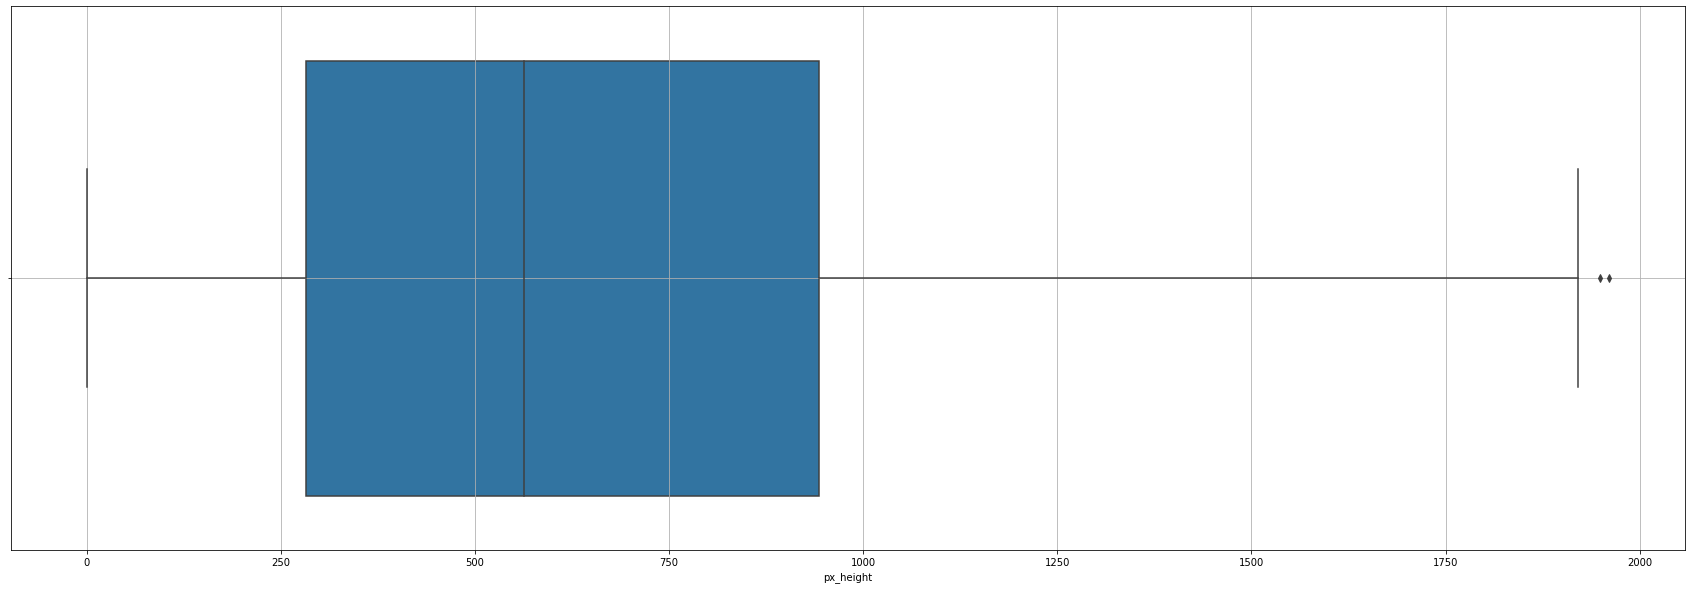

In [28]:
plt.figure(figsize=(30,10))
sns.boxplot(df.px_height)
plt.grid()
plt.show()

In [29]:
df.px_height.describe()

count    1982.000000
mean      642.509082
std       441.709410
min         0.000000
25%       282.000000
50%       562.500000
75%       943.500000
max      1960.000000
Name: px_height, dtype: float64

## finding exact index of upperbound  

In [30]:
# Upper Bound = Q3+1.5*(Q3-Q1)
# Lower Bound = Q1-1.5*(Q3-Q1)
943.500000+1.5*(943.500000-282.000000)

1935.75

In [31]:
df[df.px_height > 1935.75]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


In [32]:
index_px_height = df[df.px_height > 1935.75].index      # storing index of outlier 

In [33]:
df.drop(index_px_height,inplace=True)           #   # droping outlier

##ploting box plot speratly for three_g

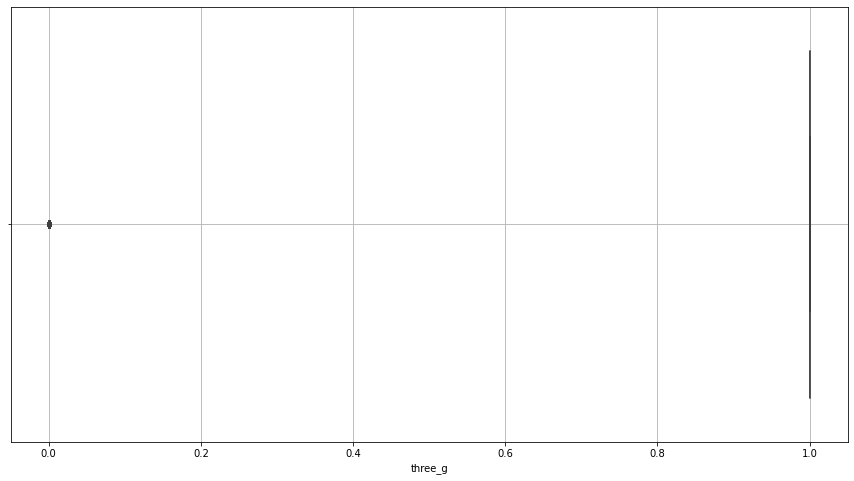

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(df.three_g)
plt.grid()
plt.show()

In [35]:
df.corr()     # finding the correlation 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.009743,0.010136,-0.042558,0.020317,0.015559,-0.008197,0.034834,0.002575,-0.026451,...,0.014290,-0.008205,-0.000121,-0.023784,-0.016533,0.047909,0.010670,-0.010004,-0.009022,0.200763
blue,0.009743,1.000000,0.021739,0.033543,0.004142,0.012593,0.037186,0.003585,-0.008442,0.038278,...,-0.010266,-0.041741,0.022024,-0.001204,0.001278,0.009541,-0.029907,0.008115,-0.019082,0.015798
clock_speed,0.010136,0.021739,1.000000,-0.002017,-0.006342,-0.041597,0.004461,-0.011400,0.011939,-0.005638,...,-0.011326,-0.009050,0.004628,-0.026876,-0.005777,-0.010122,-0.044429,0.019023,-0.021960,-0.006120
dual_sim,-0.042558,0.033543,-0.002017,1.000000,-0.034041,0.002280,-0.016975,-0.019390,-0.005955,-0.025355,...,-0.018690,0.014325,0.042491,-0.011811,-0.012968,-0.043983,-0.013474,-0.015209,0.024064,0.019016
fc,0.020317,0.004142,-0.006342,-0.034041,1.000000,-0.019355,-0.025745,0.004310,0.014011,-0.001971,...,-0.027777,-0.012505,0.019440,0.000372,-0.001778,-0.008136,-0.003121,-0.024377,0.011902,0.021120
four_g,0.015559,0.012593,-0.041597,0.002280,-0.019355,1.000000,0.008995,-0.002771,-0.017901,-0.031608,...,-0.021117,0.007998,0.008631,0.026550,0.036958,-0.046438,0.584754,0.020094,-0.021650,0.015906
int_memory,-0.008197,0.037186,0.004461,-0.016975,-0.025745,0.008995,1.000000,0.006426,-0.030009,-0.026662,...,0.009328,-0.011010,0.033712,0.039791,0.012055,-0.010334,-0.009660,-0.028687,0.010588,0.043458
m_dep,0.034834,0.003585,-0.011400,-0.019390,0.004310,-0.002771,0.006426,1.000000,0.018595,-0.003834,...,0.024797,0.022394,-0.011402,-0.027314,-0.019880,0.015418,-0.013723,-0.002823,-0.029474,-0.000925
mobile_wt,0.002575,-0.008442,0.011939,-0.005955,0.014011,-0.017901,-0.030009,0.018595,1.000000,-0.018240,...,-0.000223,-0.000128,-0.004555,-0.032044,-0.019790,0.010434,0.001730,-0.016019,-0.000862,-0.031628
n_cores,-0.026451,0.038278,-0.005638,-0.025355,-0.001971,-0.031608,-0.026662,-0.003834,-0.018240,1.000000,...,-0.003893,0.025602,0.008277,-0.002913,0.024048,0.015609,-0.015022,0.026642,-0.011145,0.008307


## visulation of correlation 

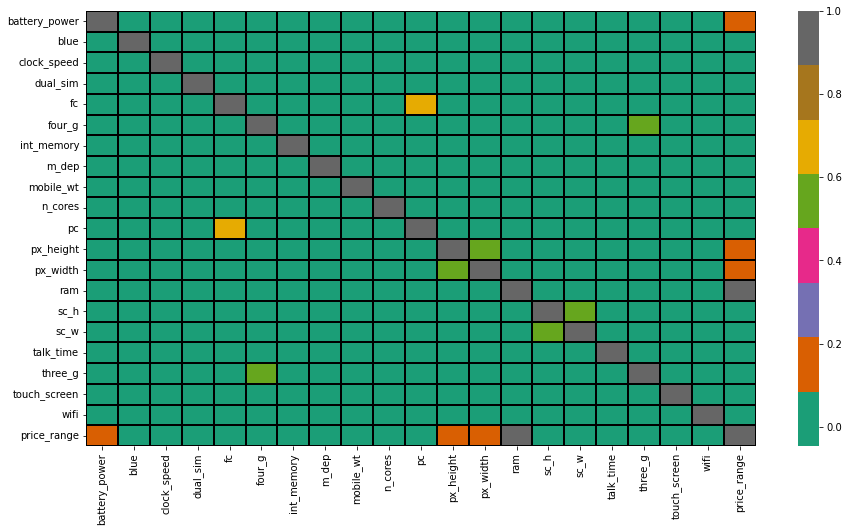

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=False,cmap='Dark2',linewidths=2,linecolor="black")
plt.show()

In [37]:
x = df.iloc[:,:-1]        # assing the x values 
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [38]:
y = df['price_range']          # assing the y values 
x
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1980, dtype: int64

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)       # split the data in the training and testing 

In [40]:
# creating function to train the model
def mymodel(model):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  print(f'Classification Report:\n{classification_report(ytest,ypred)}\n')
  print(f'Confusion Matrix:\n{confusion_matrix(ytest,ypred)}')

In [66]:
# creating object of different model
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [42]:
mymodel(knn)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       124
           1       0.88      0.94      0.91       142
           2       0.92      0.86      0.89       168
           3       0.93      0.94      0.93       160

    accuracy                           0.92       594
   macro avg       0.92      0.92      0.92       594
weighted avg       0.92      0.92      0.92       594


Confusion Matrix:
[[118   6   0   0]
 [  5 134   3   0]
 [  0  12 144  12]
 [  0   0  10 150]]


In [43]:
mymodel(svm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       124
           1       0.91      0.96      0.94       142
           2       0.97      0.86      0.91       168
           3       0.92      0.99      0.95       160

    accuracy                           0.94       594
   macro avg       0.94      0.94      0.94       594
weighted avg       0.94      0.94      0.94       594


Confusion Matrix:
[[120   4   0   0]
 [  3 137   2   0]
 [  0  10 144  14]
 [  0   0   2 158]]


In [44]:
mymodel(dt)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       124
           1       0.78      0.82      0.80       142
           2       0.79      0.75      0.77       168
           3       0.84      0.85      0.85       160

    accuracy                           0.82       594
   macro avg       0.82      0.83      0.82       594
weighted avg       0.82      0.82      0.82       594


Confusion Matrix:
[[110  14   0   0]
 [ 15 116  11   0]
 [  0  17 126  25]
 [  0   1  23 136]]


In [45]:
mymodel(rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       124
           1       0.82      0.88      0.85       142
           2       0.89      0.80      0.84       168
           3       0.92      0.93      0.93       160

    accuracy                           0.88       594
   macro avg       0.88      0.89      0.89       594
weighted avg       0.88      0.88      0.88       594


Confusion Matrix:
[[116   8   0   0]
 [ 11 125   6   0]
 [  0  20 135  13]
 [  0   0  11 149]]


In [47]:
param_grid = {"kernel":['poly', 'rbf', 'sigmoid'],
 "C":[0.1,0.01,0.001,0.0001],
 "gamma":[0.1,0.01,0.001,0.0001]}

In [48]:
# using GridsearchCV fto find best parameter 
GS = GridSearchCV(svm, param_grid, verbose=3)
GS.fit(xtrain,ytrain)
ypred = GS.predict(xtest)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.950 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.971 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.978 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.968 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.971 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.270 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.271 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.267 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.267 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.267 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.270 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid

In [50]:
GS.best_params_    # getting the best parametrer after hypertunning the model using gridesearch cv

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [69]:
H_SVC = SVC( kernel = "poly" , C = 0.1 , gamma = 0.1 )   # building the model on the best parameter

In [70]:
mymodel(H_SVC) 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       124
           1       0.93      0.94      0.94       142
           2       0.94      0.93      0.94       168
           3       0.96      0.96      0.96       160

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594


Confusion Matrix:
[[119   5   0   0]
 [  4 134   4   0]
 [  0   5 157   6]
 [  0   0   6 154]]


In [74]:
final_model= SVC( kernel = "poly" , C = 0.1 , gamma = 0.1 )   #final model for production
final_model.fit(xtrain,ytrain)
ypred=final_model.predict(xtest)



In [72]:
def predict_range(value):
    if value == 0:
      print("Price Is Low")

    elif value ==1:
      print('Price is Medium')

    elif value == 2:
      print('Price is High') 

    else:
      print('Price is Very High') 

# (Testing on Random Values)


In [73]:
# (Testing on Random Values)
mobile=[842,0,2.2,0,1,0,7,0.6,188,2, 2,20,756,2549,9,7,19,0, 0, 1]
mobile = np.array([mobile])
value = final_model.predict(mobile)
predict_range(value)

Price is Medium


In [65]:
mobile1=[1009,7822,15269,1520,1440,4600,1670,5010,1818,2600,3432,5090,7561,2549,3901,7061,1190,2120,8220,9551]
mobile1 = np.array([mobile1])
value2 = final_model.predict(mobile1)
predict_range(value2)

Price is High
